In [1]:
import torch
from torchvision import datasets, transforms
from torch import nn
from torch import optim

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
# Download and load the training data
trainset = datasets.FashionMNIST('/home/jupyter/pytorch-codes/datasets/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
# Download and load the test data
testset = datasets.FashionMNIST('/home/jupyter/pytorch-codes/datasets/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

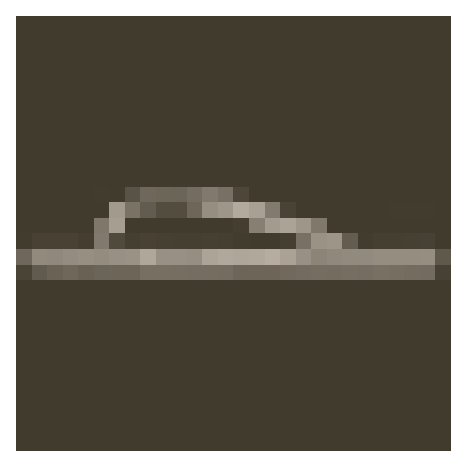

In [6]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :]);

## Building the network

In [7]:
model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.LogSoftmax(dim=1))

# Train the network

In [8]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
    
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

## Test the network!

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [ ]:
img = images[0]
img = img.resize_(1, 784)

In [ ]:
with torch.no_grad():
    log_probs = model(img)
    
probs = torch.exp(log_probs)

In [ ]:
# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), probs, version='Fashion')